## Ввод библиотек

In [1]:
import anonymizer as an
import pandas as pd
import numpy as np
import catboost
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape

In [2]:
RAND_SEED = 128

### Работа с AnonimyzerWithIDs и датасетом students.csv

In [11]:
data = pd.read_csv('students.csv')
print("Исходный датасет:")
data.head()

Исходный датасет:


,StudentID,Name,Age,Email,Department,GPA,GraduationYear
0,3336,David Palmer,19,sean43@hotmail.com,Mathematics,3.16,2026
1,8774,Andrew Roach,23,vbecker@harvey.com,Chemistry,3.75,2027
2,1396,Jonathan Gonzalez,22,hollydavis@gmail.com,Physics,2.95,2027
3,6716,Kenneth Morrow,24,ganderson@wheeler-atkins.info,Physics,3.55,2029
4,8830,Kaitlyn Martinez,18,hayesdiane@gmail.com,Chemistry,2.29,2025


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StudentID       200 non-null    int64  
 1   Name            200 non-null    object 
 2   Age             200 non-null    int64  
 3   Email           200 non-null    object 
 4   Department      200 non-null    object 
 5   GPA             200 non-null    float64
 6   GraduationYear  200 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


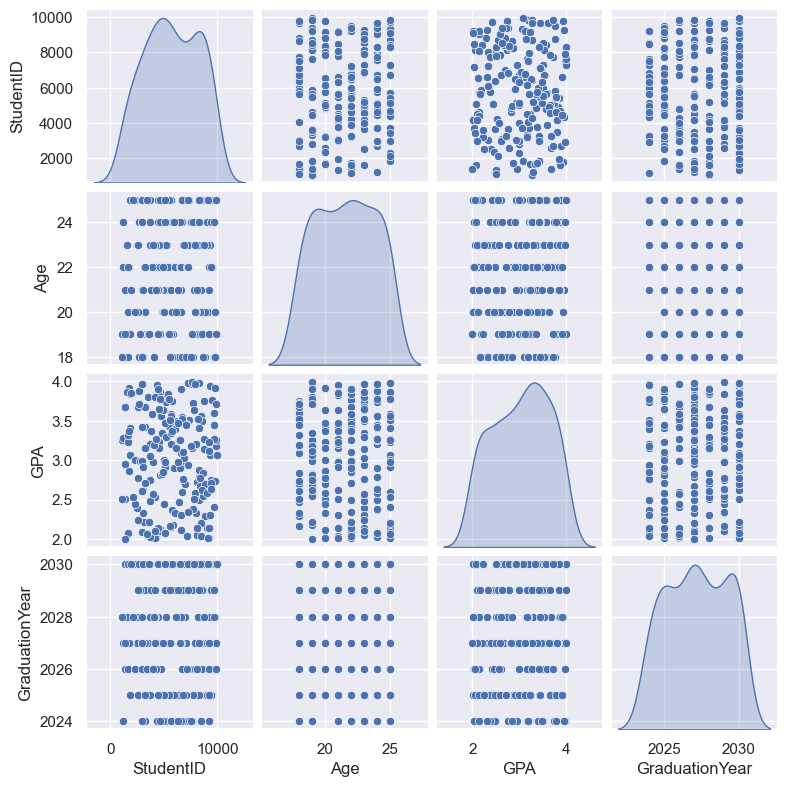

In [13]:
sns.set_theme()
sns.pairplot(data, height = 2 ,kind ='scatter',diag_kind='kde') # взаимные графики на куче признаков
plt.show()

In [14]:
y_orig = data['GPA'].copy()
X_orig = data.drop(columns=['GPA', 'StudentID'])
cat_features_orig = ['Name', 'Email', 'Department']

X_prepared_orig = X_orig.copy()
X_prepared_orig[cat_features_orig] = X_prepared_orig[cat_features_orig].astype(str)
X_prepared_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            200 non-null    object
 1   Age             200 non-null    int64 
 2   Email           200 non-null    object
 3   Department      200 non-null    object
 4   GraduationYear  200 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ KB


In [15]:
X_train_orig, X_validation_orig, y_train_orig, y_validation_orig = train_test_split(X_prepared_orig, y_orig, train_size=0.8, random_state=RAND_SEED)

model_orig = CatBoostRegressor(
    eval_metric= 'MAPE',
    random_seed = RAND_SEED
)

model_orig.fit(
    X_train_orig, y_train_orig,
    cat_features=cat_features_orig,
    eval_set=(X_validation_orig, y_validation_orig),
    verbose=False,
    plot=True
)
print('Model is fitted: ' + str(model_orig.is_fitted()))
print('Model params:')
print(model_orig.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params:
{'loss_function': 'RMSE', 'random_seed': 128, 'eval_metric': 'MAPE'}


In [16]:
y_pred_orig = model_orig.predict(X_validation_orig)
print('MAPE score:', mape(y_validation_orig, y_pred_orig))

MAPE score: 0.1875195402489797


In [17]:
processor_an = an.AnonimyzerWithIDs(models_return = True)

processed_data_an = processor_an.preprocess_dataset(data, categorical_cols=['Name', 'Email', 'Department'], numeric_cols=['StudentID', 'Name', 'Age', 'Email', 'Department', 'GraduationYear'])
print("\nОбработанный датасет:")
processed_data_an.head()


Обработанный датасет:


,X0,X1,X2,X3,X4,X5,X6
0,0.254513,0.261307,0.142857,0.753769,0.75,3.16,0.333333
1,0.864222,0.065327,0.714286,0.909548,0.25,3.75,0.500000
2,0.037000,0.472362,0.571429,0.356784,1.00,2.95,0.500000
3,0.633479,0.512563,0.857143,0.301508,1.00,3.55,0.833333
4,0.870501,0.502513,0.000000,0.336683,0.25,2.29,0.166667


In [18]:
print("\Оригинальный датасет:")
data.head()

\Оригинальный датасет:


,StudentID,Name,Age,Email,Department,GPA,GraduationYear
0,3336,David Palmer,19,sean43@hotmail.com,Mathematics,3.16,2026
1,8774,Andrew Roach,23,vbecker@harvey.com,Chemistry,3.75,2027
2,1396,Jonathan Gonzalez,22,hollydavis@gmail.com,Physics,2.95,2027
3,6716,Kenneth Morrow,24,ganderson@wheeler-atkins.info,Physics,3.55,2029
4,8830,Kaitlyn Martinez,18,hayesdiane@gmail.com,Chemistry,2.29,2025


In [19]:
cat_features_an = ['X1', 'X3', 'X4']

y_an = processed_data_an['X5'].copy()
X_an = processed_data_an.drop(columns=['X5', 'X0'])

X_prepared_an = X_an.copy()
X_prepared_an[cat_features_an] = X_prepared_an[cat_features_an].astype(str)
X_prepared_an.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      200 non-null    object 
 1   X2      200 non-null    float64
 2   X3      200 non-null    object 
 3   X4      200 non-null    object 
 4   X6      200 non-null    float64
dtypes: float64(2), object(3)
memory usage: 7.9+ KB


In [20]:
X_train_an, X_validation_an, y_train_an, y_validation_an = train_test_split(X_prepared_an, y_an, train_size=0.8, random_state=RAND_SEED)

model_an = CatBoostRegressor(
    eval_metric= 'MAPE',
    random_seed = RAND_SEED
)

model_an.fit(
    X_train_an, y_train_an,
    cat_features=cat_features_an,
    eval_set=(X_validation_an, y_validation_an),
    verbose=False,
    plot=True
)
print('Model is fitted: ' + str(model_an.is_fitted()))
print('Model params:')
print(model_an.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params:
{'loss_function': 'RMSE', 'random_seed': 128, 'eval_metric': 'MAPE'}


In [21]:
y_pred_an = model_an.predict(X_validation_an)
print('MAPE score:', mape(y_validation_an, y_pred_an))

MAPE score: 0.1875195402489797


### Работа с DifferentialPrivacyProcessor и датасетом students.csv

In [22]:
processor_dp = an.DifferentialPrivacyProcessor(epsilon_numeric=3.0, epsilon_categorical=0.1)

processed_data_dp = processor_dp.process(data, numeric_columns=['StudentID', 'Age', 'GraduationYear'], categorical_columns=['Name', 'Department'], name_columns=['Name'], email_columns=['Email'])
print("\nОбработанный датасет:")
processed_data_dp.head()


Обработанный датасет:


,StudentID,Name,Age,Email,Department,GPA,GraduationYear
0,2331.514002,Benjamin Smith,15.369435,trclh4xl@hotmail.com,Mathematics,3.16,2019.730949
1,4272.541644,Joanna Harper,18.066379,34nuw0jr@harvey.com,Physics,3.75,2027.374811
2,2533.225654,Johnathan Reed,21.722192,g4h6ofl7@gmail.com,Physics,2.95,2031.595616
3,5744.276190,Kimberly Lucas,24.095054,zvii9vr4@wheeler-atkins.info,Physics,3.55,2023.580030
4,8367.548579,Christina April Hoffman,19.871847,oewqcl56@gmail.com,Biology,2.29,2026.369700


In [23]:
print("\Оригинальный датасет:")
data.head()

\Оригинальный датасет:


,StudentID,Name,Age,Email,Department,GPA,GraduationYear
0,3336,David Palmer,19,sean43@hotmail.com,Mathematics,3.16,2026
1,8774,Andrew Roach,23,vbecker@harvey.com,Chemistry,3.75,2027
2,1396,Jonathan Gonzalez,22,hollydavis@gmail.com,Physics,2.95,2027
3,6716,Kenneth Morrow,24,ganderson@wheeler-atkins.info,Physics,3.55,2029
4,8830,Kaitlyn Martinez,18,hayesdiane@gmail.com,Chemistry,2.29,2025


In [24]:
cat_features_dp = ['Name', 'Email', 'Department']

y_dp = processed_data_dp['GPA'].copy()
X_dp = processed_data_dp.drop(columns=['GPA', 'StudentID'])

X_prepared_dp = X_dp.copy()
X_prepared_dp[cat_features_dp] = X_prepared_dp[cat_features_dp].astype(str)
X_prepared_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            200 non-null    object 
 1   Age             200 non-null    float64
 2   Email           200 non-null    object 
 3   Department      200 non-null    object 
 4   GraduationYear  200 non-null    float64
dtypes: float64(2), object(3)
memory usage: 7.9+ KB


In [25]:
X_train_dp, X_validation_dp, y_train_dp, y_validation_dp = train_test_split(X_prepared_dp, y_dp, train_size=0.8, random_state=RAND_SEED)

model_dp = CatBoostRegressor(
    eval_metric= 'MAPE',
    random_seed = RAND_SEED
)

model_dp.fit(
    X_train_dp, y_train_dp,
    cat_features=cat_features_dp,
    eval_set=(X_validation_dp, y_validation_dp),
    verbose=False,
    plot=True
)
print('Model is fitted: ' + str(model_dp.is_fitted()))
print('Model params:')
print(model_dp.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params:
{'loss_function': 'RMSE', 'random_seed': 128, 'eval_metric': 'MAPE'}


In [26]:
y_pred_dp = model_dp.predict(X_validation_dp)
print('MAPE score:', mape(y_validation_dp, y_pred_dp))

MAPE score: 0.19048484320309578


### Работа с DifferentialPrivacyProcessor и датасетом students.csv, epsilon = 1.1

In [37]:
processor_dp_eps = an.DifferentialPrivacyProcessor(epsilon_numeric=1.1, epsilon_categorical=0.1)

processed_data_dp_eps = processor_dp_eps.process(data, numeric_columns=['StudentID', 'Age', 'GraduationYear'], categorical_columns=['Name', 'Department'], name_columns=['Name'], email_columns=['Email'])
print("\nОбработанный датасет:")
processed_data_dp_eps.head()


Обработанный датасет:


,StudentID,Name,Age,Email,Department,GPA,GraduationYear
0,6789.417472,Miss Morales,15.202401,cwi0n4l7@hotmail.com,Chemistry,3.16,2025.750439
1,16318.793593,Gary Burke,18.637377,aeakkfn8@harvey.com,Mathematics,3.75,2048.788113
2,-3756.369356,Jeffrey Torres,22.338537,1d1cct8o@gmail.com,Mathematics,2.95,2029.407153
3,6879.973159,Teresa Palmer,20.938216,jkbjia7a@wheeler-atkins.info,Chemistry,3.55,2030.038147
4,6034.940931,Brittany Pena,23.863015,zhjg3k70@gmail.com,Computer Science,2.29,2024.488600


In [38]:
cat_features_dp_eps = ['Name', 'Email', 'Department']

y_dp_eps = processed_data_dp_eps['GPA'].copy()
X_dp_eps = processed_data_dp_eps.drop(columns=['GPA', 'StudentID'])

X_prepared_dp_eps = X_dp_eps.copy()
X_prepared_dp_eps[cat_features_dp_eps] = X_prepared_dp_eps[cat_features_dp_eps].astype(str)
X_prepared_dp_eps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            200 non-null    object 
 1   Age             200 non-null    float64
 2   Email           200 non-null    object 
 3   Department      200 non-null    object 
 4   GraduationYear  200 non-null    float64
dtypes: float64(2), object(3)
memory usage: 7.9+ KB


In [39]:
X_train_dp_eps, X_validation_dp_eps, y_train_dp_eps, y_validation_dp_eps = train_test_split(X_prepared_dp_eps, y_dp_eps, train_size=0.8, random_state=RAND_SEED)

model_dp_eps = CatBoostRegressor(
    eval_metric= 'MAPE',
    random_seed = RAND_SEED
)

model_dp_eps.fit(
    X_train_dp_eps, y_train_dp_eps,
    cat_features=cat_features_dp_eps,
    eval_set=(X_validation_dp_eps, y_validation_dp_eps),
    verbose=False,
    plot=True
)
print('Model is fitted: ' + str(model_dp_eps.is_fitted()))
print('Model params:')
print(model_dp_eps.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params:
{'loss_function': 'RMSE', 'random_seed': 128, 'eval_metric': 'MAPE'}


In [40]:
y_pred_dp_eps = model_dp_eps.predict(X_validation_dp_eps)
print('MAPE score:', mape(y_validation_dp_eps, y_pred_dp_eps))

MAPE score: 0.19407885890370144


### Работа с AnonimyzerWithIDs и датасетом Employe_Performance_dataset.csv 

In [3]:
data_employe_orig = pd.read_csv('Employe_Performance_dataset.csv')
data_employe_orig['Status'] = data_employe_orig['Status'].replace({'Active':'1', 'Inactive':'0'}).astype(int)
data_employe_orig['Joining Date'] = pd.to_datetime(data_employe_orig['Joining Date'])
data_employe_orig['Joining Date'] = pd.Series([value.year for value in data_employe_orig['Joining Date']]).astype(int)
data_employe_orig = data_employe_orig.rename(columns={'Joining Date':"Joining Year"})

print("Исходный датасет:")
data_employe_orig.head()

Исходный датасет:


,ID,Name,Age,Gender,Department,Salary,Joining Year,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015,2.0,16,1,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020,2.0,11,0,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019,NaN,1,0,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017,2.0,13,0,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020,5.0,16,0,New York,Evening


In [88]:
data_employe_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Name               1000 non-null   object 
 2   Age                1000 non-null   int64  
 3   Gender             1000 non-null   object 
 4   Department         1000 non-null   object 
 5   Salary             1000 non-null   int64  
 6   Joining Year       1000 non-null   int32  
 7   Performance Score  502 non-null    float64
 8   Experience         1000 non-null   int64  
 9   Status             1000 non-null   int32  
 10  Location           1000 non-null   object 
 11  Session            1000 non-null   object 
dtypes: float64(1), int32(2), int64(4), object(5)
memory usage: 86.1+ KB


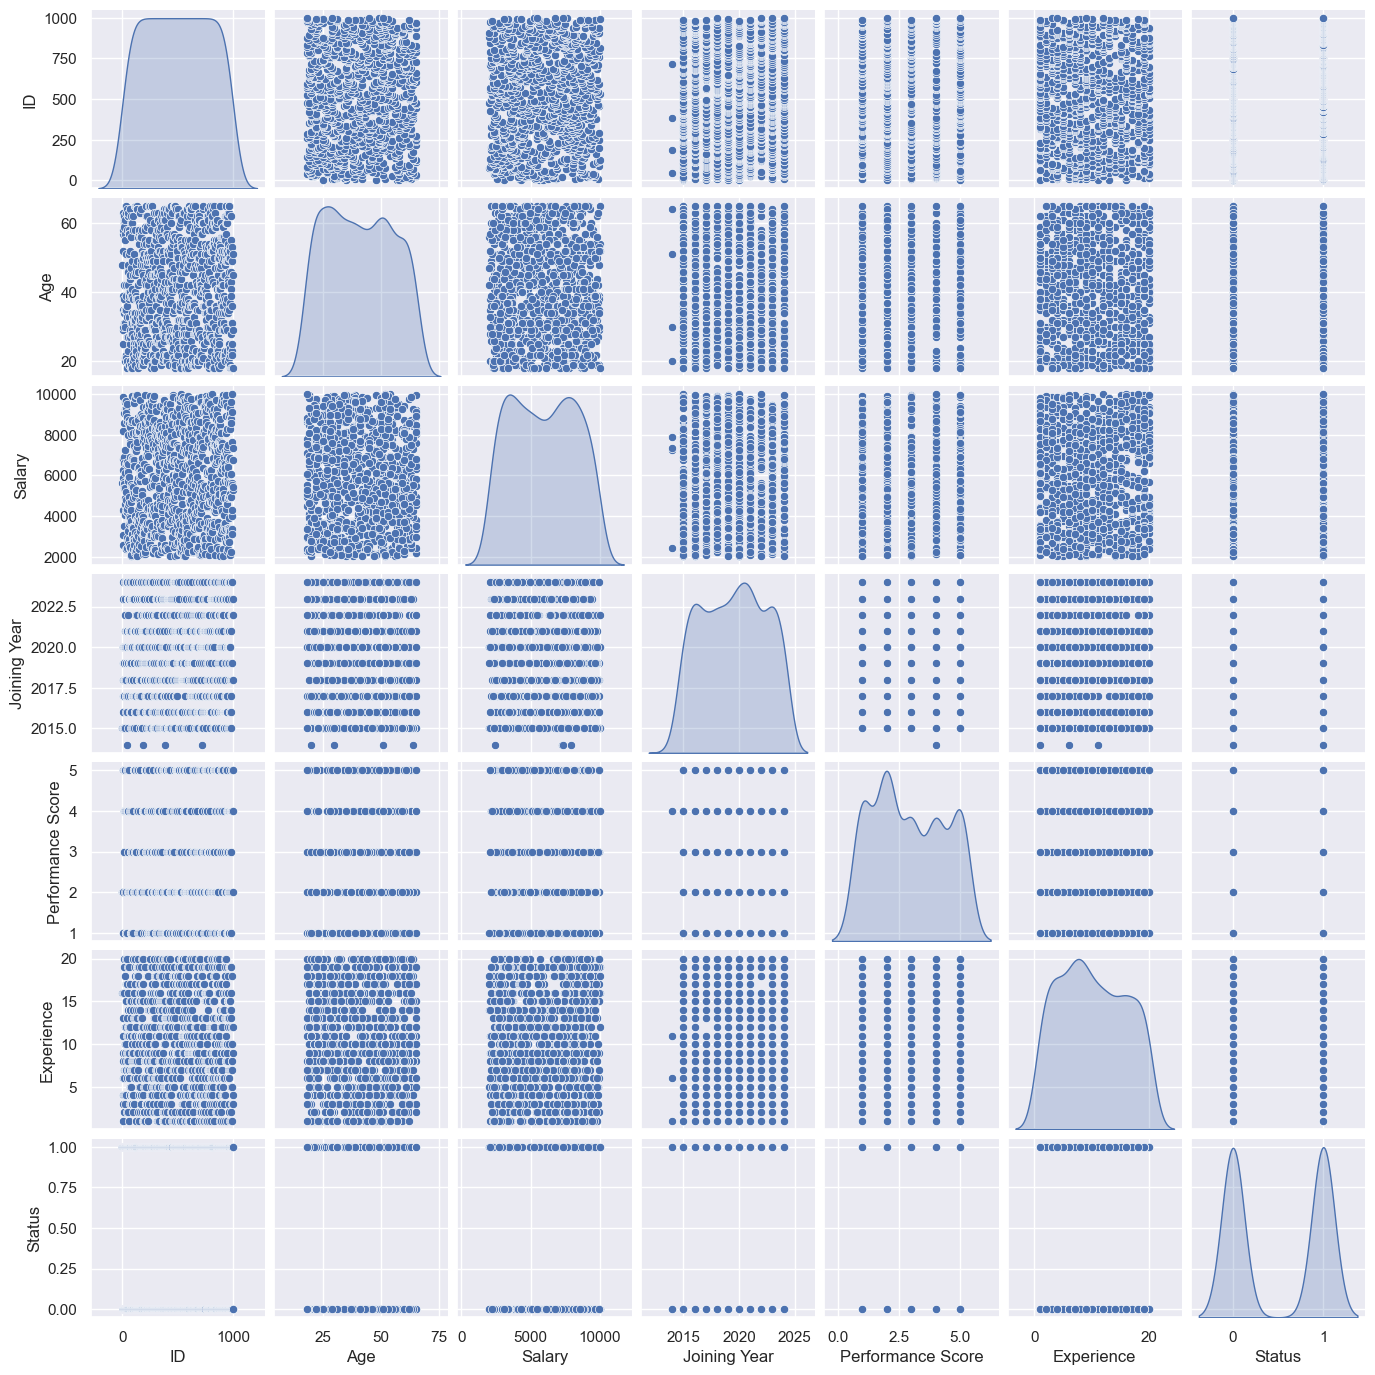

In [89]:
sns.set_theme()
sns.pairplot(data_employe_orig, height = 2 ,kind ='scatter',diag_kind='kde') # взаимные графики на куче признаков
plt.show()

In [90]:
data_employe_orig.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Department', 'Salary', 'Joining Year',
       'Performance Score', 'Experience', 'Status', 'Location', 'Session'],
      dtype='object')

In [98]:
data_employe_orig.head()

,ID,Name,Age,Gender,Department,Salary,Joining Year,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015,2.0,16,1,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020,2.0,11,0,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019,NaN,1,0,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017,2.0,13,0,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020,5.0,16,0,New York,Evening


In [92]:
y_employe_orig = data_employe_orig['Status'].copy()
X_employe_orig = data_employe_orig.drop(columns=['Status', 'ID'])
cat_features_employe_orig = ['Name', 'Gender', 'Department', 'Location', 'Session']

X_prepared_employe_orig = X_employe_orig.copy()
X_prepared_employe_orig[cat_features_employe_orig] = X_prepared_employe_orig[cat_features_employe_orig].astype(str)
X_prepared_employe_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1000 non-null   object 
 1   Age                1000 non-null   int64  
 2   Gender             1000 non-null   object 
 3   Department         1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Joining Year       1000 non-null   int32  
 6   Performance Score  502 non-null    float64
 7   Experience         1000 non-null   int64  
 8   Location           1000 non-null   object 
 9   Session            1000 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 74.3+ KB


In [99]:
y_employe_orig = data_employe_orig['Salary'].copy()
X_employe_orig = data_employe_orig.drop(columns=['Salary', 'ID'])
cat_features_employe_orig = ['Name', 'Gender', 'Department', 'Location', 'Session', 'Status']

X_prepared_employe_orig = X_employe_orig.copy()
X_prepared_employe_orig[cat_features_employe_orig] = X_prepared_employe_orig[cat_features_employe_orig].astype(str)
X_prepared_employe_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1000 non-null   object 
 1   Age                1000 non-null   int64  
 2   Gender             1000 non-null   object 
 3   Department         1000 non-null   object 
 4   Joining Year       1000 non-null   int32  
 5   Performance Score  502 non-null    float64
 6   Experience         1000 non-null   int64  
 7   Status             1000 non-null   object 
 8   Location           1000 non-null   object 
 9   Session            1000 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 74.3+ KB


In [101]:
X_train_employe_orig, X_validation_employe_orig, y_train_employe_orig, y_validation_employe_orig = train_test_split(X_prepared_employe_orig, y_employe_orig, train_size=0.8, random_state=RAND_SEED)

model_employe_orig = CatBoostRegressor(
    eval_metric= 'MAPE',
    random_seed = RAND_SEED
)

model_employe_orig.fit(
    X_train_employe_orig, y_train_employe_orig,
    cat_features=cat_features_employe_orig,
    eval_set=(X_validation_employe_orig, y_validation_employe_orig),
    verbose=False,
    plot=True
)
print('Model is fitted: ' + str(model_employe_orig.is_fitted()))
print('Model params:')
print(model_employe_orig.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params:
{'loss_function': 'RMSE', 'random_seed': 128, 'eval_metric': 'MAPE'}


In [102]:
y_pred_employe_orig = model_employe_orig.predict(X_validation_employe_orig)
print('MAPE score:', mape(y_validation_employe_orig, y_pred_employe_orig))

MAPE score: 0.39649137022467956


In [4]:
data_employe_orig

,ID,Name,Age,Gender,Department,Salary,Joining Year,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015,2.0,16,1,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020,2.0,11,0,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019,NaN,1,0,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017,2.0,13,0,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020,5.0,16,0,New York,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Pamela Reeves,49,Female,Sales,7652,2024,4.0,3,1,Los Angeles,Evening
996,997,Todd Johnson,29,Female,Sales,6754,2018,NaN,12,0,New York,Morning
997,998,Michael Sanchez,18,Male,Sales,5278,2023,5.0,3,1,New York,Morning
998,999,Ashley Taylor,51,Female,IT,5437,2022,4.0,9,0,Los Angeles,Evening


In [4]:
processor_employe_an = an.AnonimyzerWithIDs()

processed_data_employe_an = processor_employe_an.preprocess_dataset(data_employe_orig, categorical_cols=['Name', 'Gender', 'Department', 'Location', 'Session'], 
                                                                    numeric_cols=['Name', 'Age', 'Gender', 'Department', 'Joining Year', 'Performance Score', 'Experience', 'Status', 'Location', 'Session'])
print("\nОбработанный датасет:")
processed_data_employe_an.head()

Name
Gender
Department
Location
Session

Обработанный датасет:


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,1,0.189707,0.638298,0.0,0.0,5641,0.1,0.25,0.789474,1.0,1.0,1.0
1,2,0.949546,0.148936,1.0,1.0,4249,0.6,0.25,0.526316,0.0,0.5,0.0
2,3,0.146317,0.829787,1.0,1.0,3058,0.5,NaN,0.000000,0.0,1.0,0.5
3,4,0.169526,0.851064,0.0,0.5,5895,0.3,0.25,0.631579,0.0,0.5,0.0
4,5,0.028254,0.361702,1.0,0.5,4317,0.6,1.00,0.789474,0.0,1.0,0.0


In [5]:
print("\Оригинальный датасет:")
data_employe_orig.head()

\Оригинальный датасет:


,ID,Name,Age,Gender,Department,Salary,Joining Year,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015,2.0,16,1,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020,2.0,11,0,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019,NaN,1,0,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017,2.0,13,0,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020,5.0,16,0,New York,Evening


In [7]:
cat_features_employe_an = ['X1', 'X3', 'X4', 'X9', 'X10', 'X11']

y_employe_an = processed_data_employe_an['X5'].copy()
X_employe_an = processed_data_employe_an.drop(columns=['X5', 'X0'])

X_prepared_employe_an = X_employe_an.copy()
X_prepared_employe_an[cat_features_employe_an] = X_prepared_employe_an[cat_features_employe_an].astype(str)
X_prepared_employe_an.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   object 
 1   X2      1000 non-null   float64
 2   X3      1000 non-null   object 
 3   X4      1000 non-null   object 
 4   X6      1000 non-null   float64
 5   X7      502 non-null    float64
 6   X8      1000 non-null   float64
 7   X9      1000 non-null   object 
 8   X10     1000 non-null   object 
 9   X11     1000 non-null   object 
dtypes: float64(4), object(6)
memory usage: 78.3+ KB


In [9]:
X_train_employe_an, X_validation_employe_an, y_train_employe_an, y_validation_employe_an = train_test_split(X_prepared_employe_an, y_employe_an, train_size=0.8, random_state=RAND_SEED)

model_employe_an = CatBoostRegressor(
    eval_metric= 'MAPE',
    random_seed = RAND_SEED
)

model_employe_an.fit(
    X_train_employe_an, y_train_employe_an,
    cat_features=cat_features_employe_an,
    eval_set=(X_validation_employe_an, y_validation_employe_an),
    verbose=False,
    plot=True
)
print('Model is fitted: ' + str(model_employe_an.is_fitted()))
print('Model params:')
print(model_employe_an.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params:
{'loss_function': 'RMSE', 'random_seed': 128, 'eval_metric': 'MAPE'}


In [10]:
y_pred_employe_an = model_employe_an.predict(X_validation_employe_an)
print('MAPE score:', mape(y_validation_employe_an, y_pred_employe_an))

MAPE score: 0.39649137022467956


### Работа с DifferentialPrivacyProcessor и датасетом Employe_Performance_dataset.csv

In [15]:
processor_employe_dp = an.DifferentialPrivacyProcessor(epsilon_numeric=2.0, epsilon_categorical=0.5)

processed_data_employe_dp = processor_employe_dp.process(data_employe_orig, numeric_columns=['Age', 'Joining Year', 'Performance Score', 'Experience'], categorical_columns=['Gender', 'Department', 'Location', 'Session'], name_columns=['Name'])
print("\nОбработанный датасет:")
processed_data_employe_dp.head()


Обработанный датасет:


,ID,Name,Age,Gender,Department,Salary,Joining Year,Performance Score,Experience,Status,Location,Session
0,1,Mr. Jones,53.000884,Male,HR,5641,2013.063442,2.556328,-17.615332,1,New York,Night
1,2,Laura Graves,219.515441,Other,Sales,4249,2019.738988,2.499797,9.108288,0,Los Angeles,Evening
2,3,Ashley Brown,80.860696,Other,IT,3058,2021.762482,NaN,0.648222,0,New York,Night
3,4,Kelly Reed,36.034120,Female,IT,5895,2016.376708,4.707812,18.028847,0,Los Angeles,Evening
4,5,Anthony Patterson,43.190890,Male,IT,4317,2025.070198,7.587125,21.188782,0,Chicago,Morning


In [16]:
print("\Оригинальный датасет:")
data_employe_orig.head()

\Оригинальный датасет:


,ID,Name,Age,Gender,Department,Salary,Joining Year,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015,2.0,16,1,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020,2.0,11,0,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019,NaN,1,0,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017,2.0,13,0,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020,5.0,16,0,New York,Evening


In [17]:
cat_features_employe_dp = ['Name', 'Gender', 'Department', 'Location', 'Session', 'Status']

y_employe_dp = processed_data_employe_dp['Salary'].copy()
X_employe_dp = processed_data_employe_dp.drop(columns=['Salary', 'ID'])

X_prepared_employe_dp = X_employe_dp.copy()
X_prepared_employe_dp[cat_features_employe_dp] = X_prepared_employe_dp[cat_features_employe_dp].astype(str)
X_prepared_employe_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1000 non-null   object 
 1   Age                1000 non-null   float64
 2   Gender             1000 non-null   object 
 3   Department         1000 non-null   object 
 4   Joining Year       1000 non-null   float64
 5   Performance Score  502 non-null    float64
 6   Experience         1000 non-null   float64
 7   Status             1000 non-null   object 
 8   Location           1000 non-null   object 
 9   Session            1000 non-null   object 
dtypes: float64(4), object(6)
memory usage: 78.3+ KB


In [18]:
X_train_employe_dp, X_validation_employe_dp, y_train_employe_dp, y_validation_employe_dp = train_test_split(X_prepared_employe_dp, y_employe_dp, train_size=0.8, random_state=RAND_SEED)

model_employe_dp = CatBoostRegressor(
    eval_metric= 'MAPE',
    random_seed = RAND_SEED
)

model_employe_dp.fit(
    X_train_employe_dp, y_train_employe_dp,
    cat_features=cat_features_employe_dp,
    eval_set=(X_validation_employe_dp, y_validation_employe_dp),
    verbose=False,
    plot=True
)
print('Model is fitted: ' + str(model_employe_dp.is_fitted()))
print('Model params:')
print(model_employe_dp.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params:
{'loss_function': 'RMSE', 'random_seed': 128, 'eval_metric': 'MAPE'}


In [20]:
y_pred_employe_dp = model_employe_dp.predict(X_validation_employe_dp)
print('MAPE score:', mape(y_validation_employe_dp, y_pred_employe_dp))

MAPE score: 0.39770655424889284
